**Kelompok 10 2023F**
1. Destia Rika (23031554052)
2. Nadira Zahra Ramadhani (23031554099)
3. Tarisa Dwita Abadi (23031554134)

In [163]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [164]:
import pandas as pd  # Manipulasi Data
import numpy as np  # Operasi Numerik
import matplotlib.pyplot as plt  # Visualisasi
import seaborn as sns  # Visualisasi yang lebih baik
from sklearn.impute import SimpleImputer  # Menangani Missing Values
from sklearn.preprocessing import StandardScaler  # Normalisasi Data
from sklearn.model_selection import train_test_split  # Membagi Data Train-Test
from sklearn.neighbors import KNeighborsClassifier  # Model KNN
from sklearn.metrics import accuracy_score, classification_report  # Evaluasi Model

# *Data Explorasi* #

Melakukan pengambilan data dari UCI Machine Learning Repository menggunakan libary ucimlrepo

In [165]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

# variable information
print(support2.variables)

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [166]:
df = pd.read_csv("C:\\Users\\tassy\\OneDrive\\Documents\\Tarisa\\data mining\\data.csv")
df

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.000000
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.000000
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.000000
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,NaN,0.000000
9101,9102,55.15399,0,female,0,29,347,Coma,Coma,1,...,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,NaN,0.000000
9102,9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,NaN,2.525391
9103,9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,...,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,<2 mo. follow-up,0.000000


In [ ]:
print(df.columns)  # Cek semua kolom yang masih ada

Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

# *Data Cleaning*

#### *handling missing value* ####

In [ ]:
# Cek jumlah missing values dan persentasenya
missing_info = pd.DataFrame({
    'Kolom': df.columns,
    'Jumlah Missing': df.isnull().sum(),
    'Persentase (%)': df.isnull().sum() / len(df) * 100,
    'Tipe Data': df.dtypes
})

missing_info = missing_info[missing_info['Jumlah Missing'] > 0].sort_values(by='Persentase (%)', ascending=False)

print("\n--- Missing Values Sebelum Diproses ---")
print(missing_info)


--- Missing Values Sebelum Diproses ---
           Kolom  Jumlah Missing  Persentase (%) Tipe Data
adlp        adlp            5641       61.954970   float64
urine      urine            4862       53.399231   float64
glucose  glucose            4500       49.423394   float64
bun          bun            4352       47.797913   float64
totmcst  totmcst            3475       38.165843   float64
alb          alb            3372       37.034596   float64
income    income            2982       32.751236    object
adls        adls            2867       31.488193   float64
bili        bili            2601       28.566722   float64
pafi        pafi            2325       25.535420   float64
ph            ph            2284       25.085118   float64
prg2m      prg2m            1649       18.110928   float64
edu          edu            1634       17.946183   float64
prg6m      prg6m            1633       17.935200   float64
sfdm2      sfdm2            1400       15.376167    object
totcst    totcs

Menghapus kolom yang memiliki missing values lebih dari 50% karena jumlah missing yang terlalu banyak dapat mengurangi kualitas informasi dalam data dan menyebabkan noise yang mana setelah dipastikan kolom yang dihapus tidak berhubungan langsung dengan target. Sementara itu, kolom dengan missing values kurang dari 50% tidak dihapus, tetapi dilakukan imputasi. Untuk kolom numerik, missing values diisi dengan median guna menjaga distribusi data, sedangkan untuk kolom kategorikal, diisi dengan modus agar tetap mewakili pola asli data

In [ ]:
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1).copy()

for col in df.columns:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

for col in df.select_dtypes(include=['number']).columns:
    if df[col].notna().sum() > 0:
        df.loc[:, col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    if df[col].notna().sum() > 0:
        df.loc[:, col] = df[col].fillna(df[col].mode()[0])

missing_values = df.isnull().sum().sum()
print("Total missing values setelah preprocessing:", missing_values)

if missing_values > 0:
    print("\nKolom yang masih memiliki missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

Total missing values setelah preprocessing: 0


In [ ]:
print(df.columns)  # Cek semua kolom dalam DataFrame

Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'num.co',
       'edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m',
       'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'adls', 'adlsc',
       'dzgroup_CHF', 'dzgroup_COPD', 'dzgroup_Cirrhosis',
       'dzgroup_Colon Cancer', 'dzgroup_Coma', 'dzgroup_Lung Cancer',
       'dzgroup_MOSF w/Malig', 'dzclass_COPD/CHF/Cirrhosis', 'dzclass_Cancer',
       'dzclass_Coma', 'income_$25-$50k', 'income_>$50k', 'income_under $11k',
       'race_black', 'race_hispanic', 'race_other', 'race_white',
       'sfdm2_Coma or Intub', 'sfdm2_SIP>=30', 'sfdm2_adl>=4 (>=5 if sur)',
       'sfdm2_no(M2 and SIP pres)', 'ca_no', 'ca_yes'],
      dtype='object')


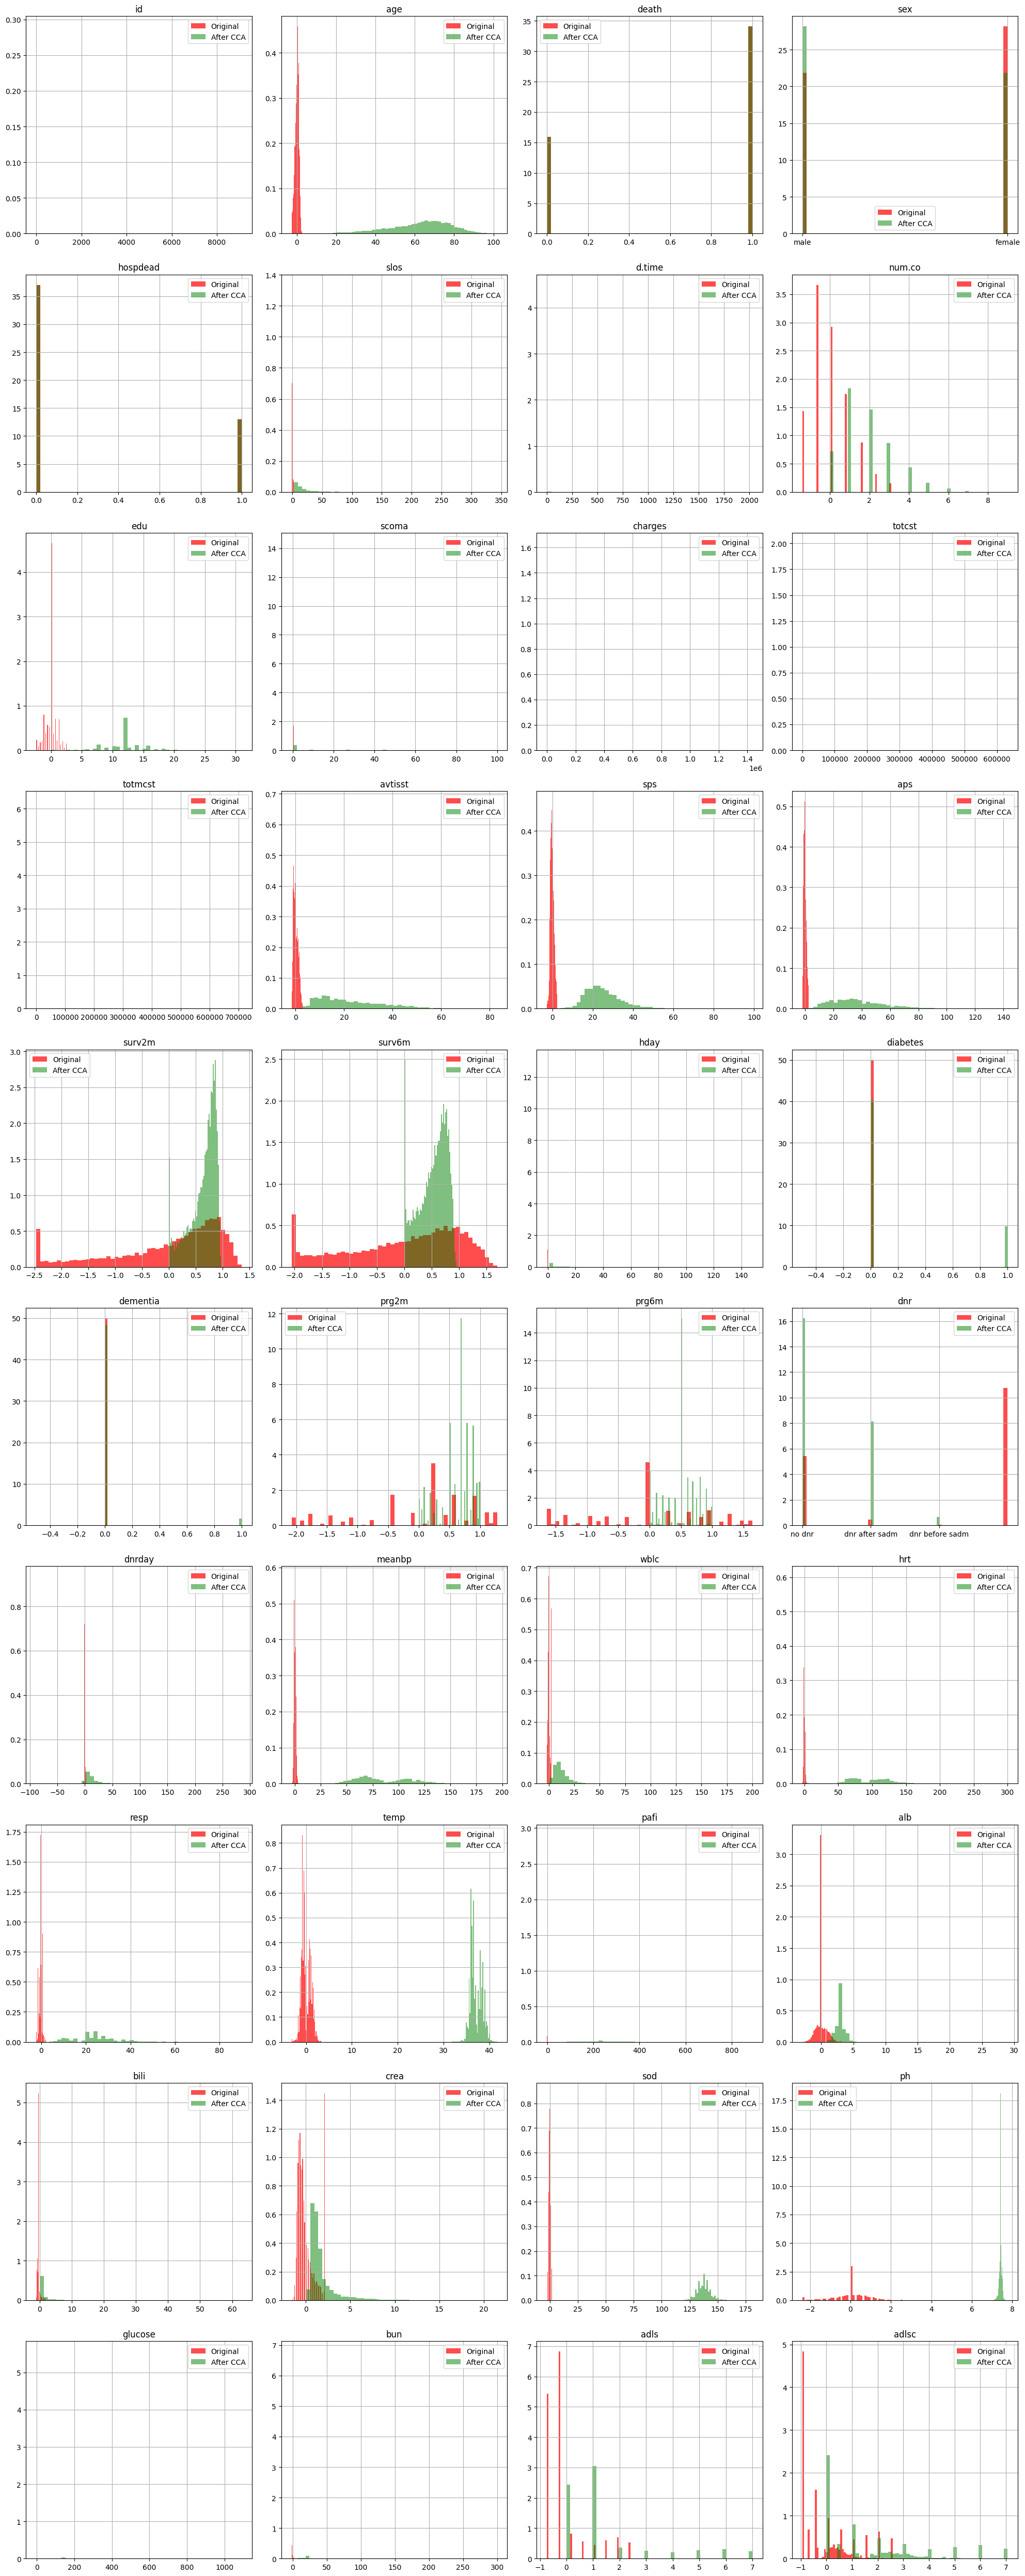

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

if 'new_df' not in globals():
    new_df = df.copy()  

features = ['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
            'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
            'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
            'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
            'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
            'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
            'adlsc']

valid_features = [feature for feature in features if feature in df.columns and feature in new_df.columns]

if not valid_features:
    print("Tidak ada fitur yang bisa diproses.")
else:
    num_features = len(valid_features)
    rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)  

    fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
    axes = axes.flatten()  

    for i, feature in enumerate(valid_features):
        ax = axes[i]
        df[feature].hist(bins=50, ax=ax, density=True, color='red', alpha=0.7, label='Original')
        new_df[feature].hist(bins=50, ax=ax, density=True, color='green', alpha=0.5, label='After CCA')

        ax.set_title(feature)
        ax.legend()

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    

Dari hasil visualisasi setelah melakukan handling missing value, diperoleh warna coklat yang menunjukkan bahwa distribusi data tidak berubah secara signifikan setelah proses handling missing value. Warna coklat muncul karena histogram sebelum (merah) dan setelah (hijau) handling missing value saling bertumpang tindih. Hal ini menunjukkan bahwa metode yang digunakan berhasil mempertahankan distribusi awal, sehingga tidak menimbulkan bias yang besar akibat data yang hilang. Tetapi terdapat juga dominasi warna merah atau hijau pada suatu variabel, berarti ada perbedaan signifikan setelah handling missing value.

### *Hendling Outlier*

Melakukan visualisasi untuk melihat outlier di setiap fitur

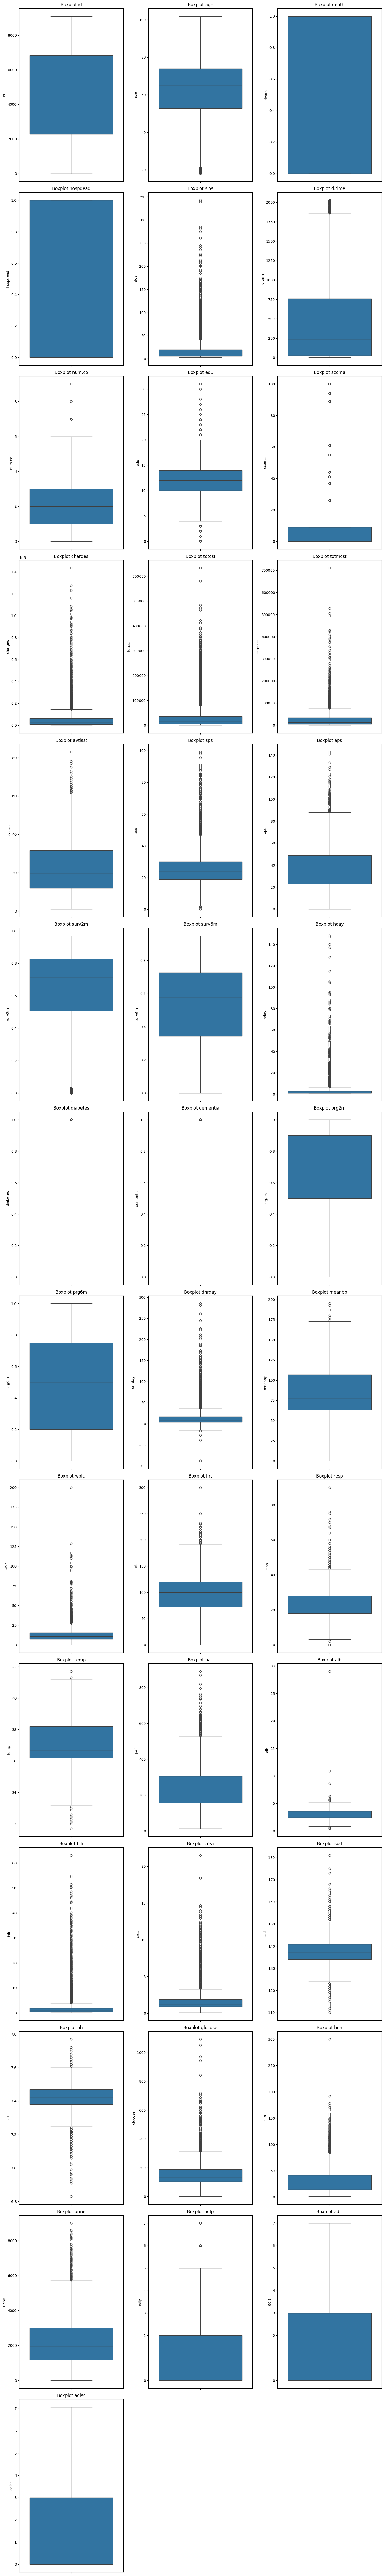

In [ ]:
df = pd.read_csv("data.csv")

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, len(numeric_columns) * 2.5))  
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) // 3) + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [ ]:
outlier_columns = []

for col in numeric_columns:
    if col in df.columns:  # Cek apakah kolom masih ada
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

print("Kolom yang memiliki outlier:", outlier_columns)
outlier_columns

Kolom yang memiliki outlier: ['age', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'hday', 'diabetes', 'dementia', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp']


['age',
 'slos',
 'd.time',
 'num.co',
 'edu',
 'scoma',
 'charges',
 'totcst',
 'totmcst',
 'avtisst',
 'sps',
 'aps',
 'surv2m',
 'hday',
 'diabetes',
 'dementia',
 'dnrday',
 'meanbp',
 'wblc',
 'hrt',
 'resp',
 'temp',
 'pafi',
 'alb',
 'bili',
 'crea',
 'sod',
 'ph',
 'glucose',
 'bun',
 'urine',
 'adlp']

Melakukan penanganan pada outlier dengan menggunakan quartil

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")  
df_before = df.copy()  

outlier_columns = [
    'age', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'charges', 'totcst',
    'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'hday', 'diabetes',
    'dementia', 'prg2m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp',
    'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'adls'
]

outlier_columns = [col for col in outlier_columns if col in df.columns and df[col].dtype in ['int64', 'float64']]

for col in outlier_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 

    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    df[col] = np.clip(df[col], lower_bound, upper_bound)

    print(f"{col}: {outliers_before} outlier ditangani.")

df.to_csv("data_no_outlier.csv", index=False)

print("Data berhasil disimpan tanpa outlier!")

age: 56 outlier ditangani.
slos: 768 outlier ditangani.
d.time: 267 outlier ditangani.
num.co: 25 outlier ditangani.
edu: 199 outlier ditangani.
scoma: 1955 outlier ditangani.
charges: 912 outlier ditangani.
totcst: 749 outlier ditangani.
totmcst: 495 outlier ditangani.
avtisst: 43 outlier ditangani.
sps: 283 outlier ditangani.
aps: 178 outlier ditangani.
surv2m: 307 outlier ditangani.
hday: 1543 outlier ditangani.
diabetes: 1778 outlier ditangani.
dementia: 296 outlier ditangani.
prg2m: 0 outlier ditangani.
dnrday: 799 outlier ditangani.
meanbp: 6 outlier ditangani.
wblc: 399 outlier ditangani.
hrt: 40 outlier ditangani.
resp: 313 outlier ditangani.
temp: 14 outlier ditangani.
pafi: 90 outlier ditangani.
alb: 15 outlier ditangani.
bili: 926 outlier ditangani.
crea: 987 outlier ditangani.
sod: 256 outlier ditangani.
ph: 260 outlier ditangani.
glucose: 272 outlier ditangani.
bun: 267 outlier ditangani.
adls: 0 outlier ditangani.
Data berhasil disimpan tanpa outlier!


Menampilkan visualisasi sebelum dan sesudah melakukan handling outlier

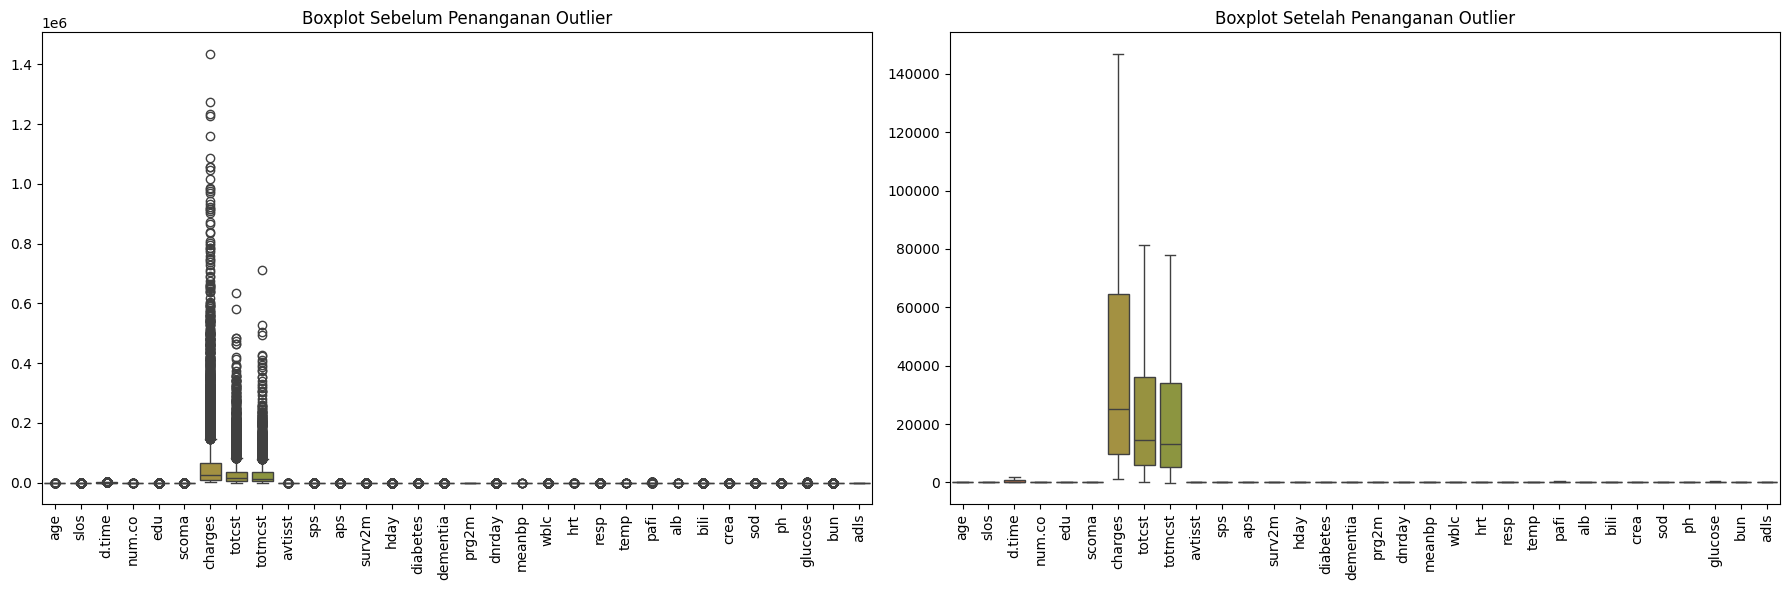

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_before[outlier_columns])
plt.xticks(rotation=90)
plt.title("Boxplot Sebelum Penanganan Outlier")

plt.subplot(1, 2, 2)
sns.boxplot(data=df[outlier_columns]) 
plt.xticks(rotation=90)
plt.title("Boxplot Setelah Penanganan Outlier")

plt.tight_layout()
plt.show()


# *Data Reduction* 

### *Reduksi Redundansi*

Menggunakan redundansi dalam fitur, agar model yang digunakan lebih optimal

Melakukan visualisasi sebelum melakukan redundansi untuk mengetahui fitur yang memiliki 90% informasi yang sama

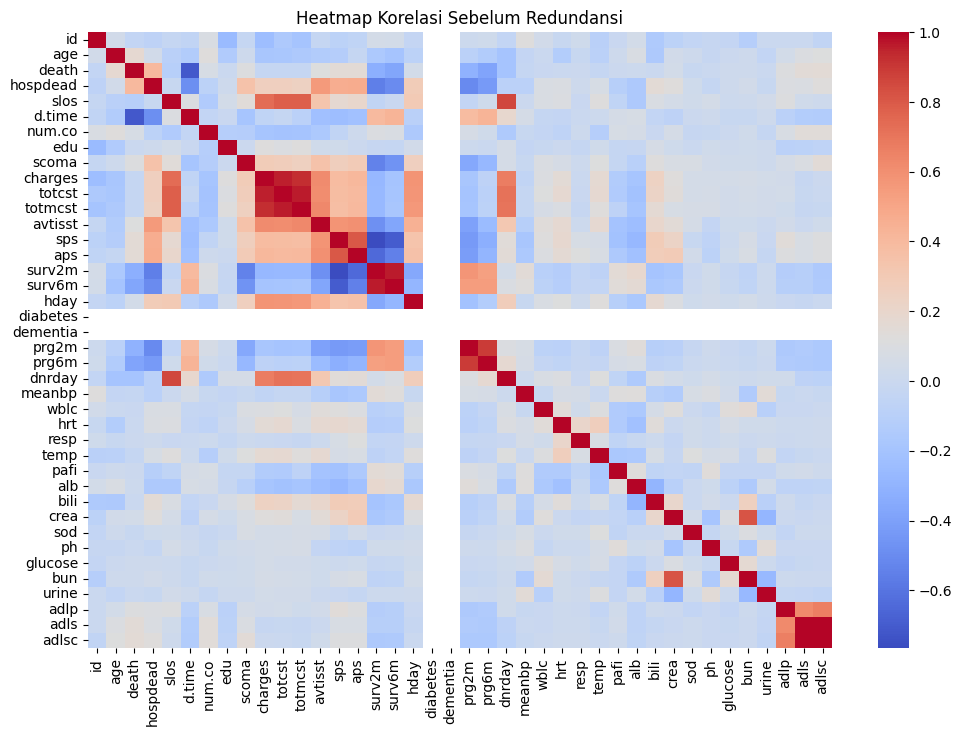

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Heatmap Korelasi Sebelum Redundansi")
plt.show()

In [ ]:
import numpy as np
import pandas as pd

df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr().abs()

high_corr_features = np.where(corr_matrix > 0.9)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr_features) if x != y]

seen = set()
filtered_high_corr = []
for f1, f2 in high_corr_pairs:
    if (f2, f1) not in seen:
        filtered_high_corr.append((f1, f2))
        seen.add((f1, f2))

print("Fitur dengan korelasi tinggi (>0.9):")
for feature1, feature2 in filtered_high_corr:
    print(f"{feature1} - {feature2}")

Fitur dengan korelasi tinggi (>0.9):
charges - totcst
charges - totmcst
totcst - totmcst
surv2m - surv6m
adls - adlsc


Menghapus fitur yang memiliki 90% informasi yang sama

In [ ]:
df.drop(columns=['totmcst', 'surv6m', 'adlsc', 'charges'], inplace=True)

Visualisasi setelah dilakukan redundansi

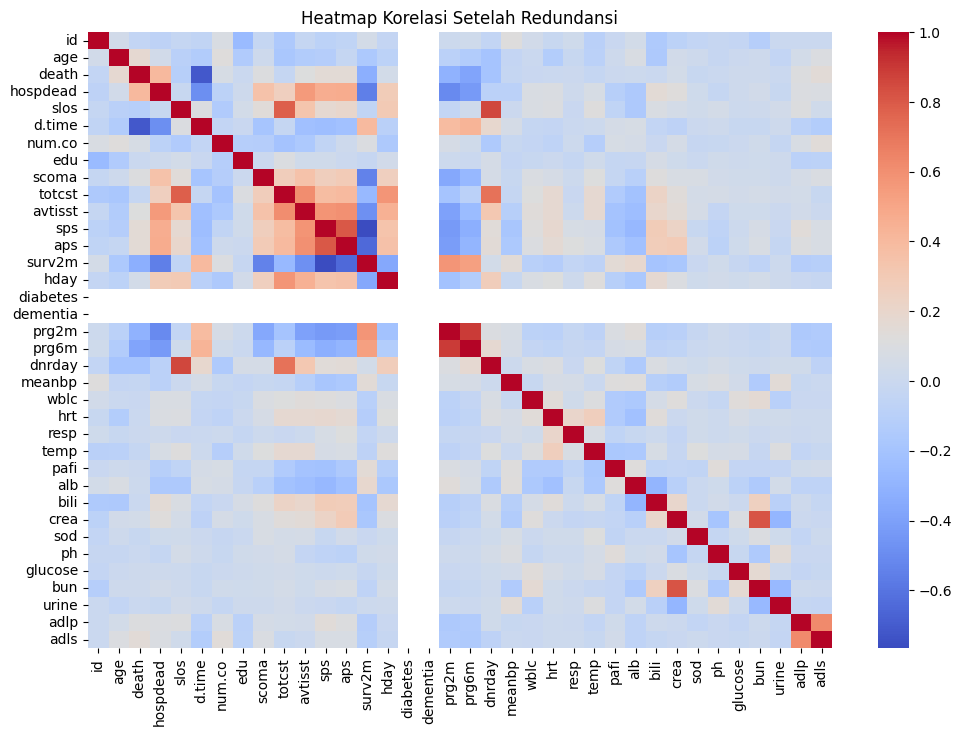

In [ ]:
df_numeric_after = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric_after.corr(), cmap='coolwarm', annot=False)
plt.title("Heatmap Korelasi Setelah Redundansi")
plt.show()

In [217]:
print(df.columns)

Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'totcst', 'avtisst',
       'race', 'sps', 'aps', 'surv2m', 'hday', 'diabetes', 'dementia', 'ca',
       'prg2m', 'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp',
       'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun',
       'urine', 'adlp', 'adls', 'sfdm2'],
      dtype='object')


### *pca*

Dalam melakukan data reduction, kami juga menggunakan PCA untuk mengurangi dimensi data dengan tetap mempertahankan informasi sebanyak mungkin dari data

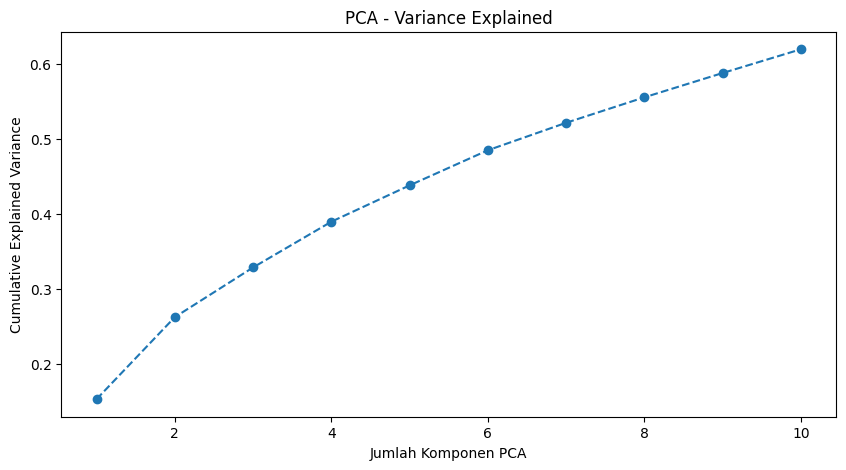

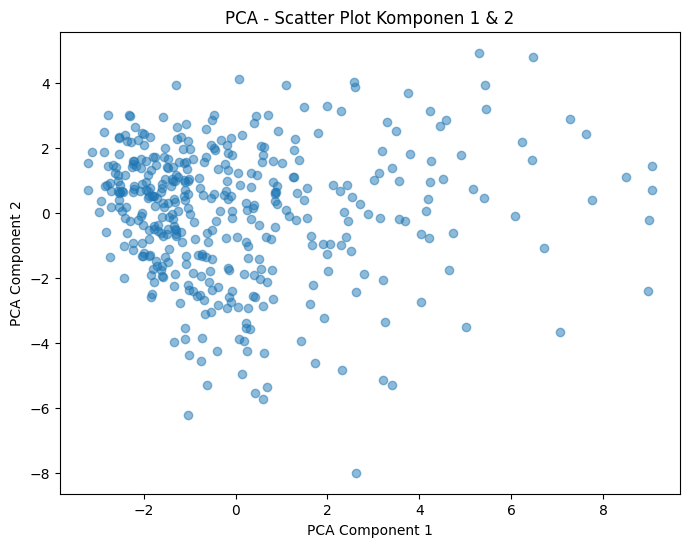

Varians yang dijelaskan oleh setiap komponen PCA:
[0.15227093 0.10969755 0.0664814  0.06115435 0.04858729 0.04693684
 0.03675092 0.03406152 0.03248117 0.03176378]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data_no_outlier.csv")  

df_numeric = df.select_dtypes(include=['int64', 'float64']).dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

n_components = min(10, df_numeric.shape[1])
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen PCA')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - Scatter Plot Komponen 1 & 2')
plt.show()

df_pca_final = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print("Varians yang dijelaskan oleh setiap komponen PCA:")
print(pca.explained_variance_ratio_)

# *Data Transformation*

### *Label Encoding*

Kami menggunakan label encoding untuk mengubah data kategorikal menjadi numerik, agar lebih mudah dipahami oleh model

In [ ]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['sex', 'dnr', 'hospdead']  
label_enc = LabelEncoder()
for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str)) 

multi_category_cols = ['dzgroup', 'dzclass', 'income', 'race', 'sfdm2', 'ca']  
df = pd.get_dummies(df, columns=multi_category_cols, drop_first=True)
df

,id,age,death,sex,hospdead,slos,d.time,num.co,edu,scoma,...,race_black,race_hispanic,race_other,race_white,sfdm2_Coma or Intub,sfdm2_SIP>=30,sfdm2_adl>=4 (>=5 if sur),sfdm2_no(M2 and SIP pres),ca_no,ca_yes
0,1,62.84998,0,1,0,5,1863.5,0,11.0,0.0,...,False,False,True,False,False,False,False,False,False,False
1,2,60.33899,1,0,1,4,4.0,2,12.0,22.5,...,False,False,False,True,False,False,False,False,True,False
2,3,52.74698,1,0,0,17,47.0,2,12.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,4,42.38498,1,0,0,3,133.0,2,11.0,0.0,...,False,False,False,True,False,False,False,True,False,False
4,5,79.88495,0,0,0,16,1863.5,1,NaN,22.5,...,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,9101,66.07300,0,1,0,23,350.0,1,8.0,0.0,...,False,False,False,True,False,False,False,False,True,False
9101,9102,55.15399,0,0,0,29,347.0,1,11.0,22.5,...,False,False,False,True,False,False,False,False,True,False
9102,9103,70.38196,0,1,0,8,346.0,1,NaN,0.0,...,False,False,False,True,False,False,False,False,True,False
9103,9104,47.01999,1,1,1,7,7.0,1,13.0,0.0,...,False,False,False,True,False,False,False,False,False,True


In [220]:
print(df.dtypes)

id                             int64
age                          float64
death                          int64
sex                            int32
hospdead                       int32
                              ...   
sfdm2_SIP>=30                   bool
sfdm2_adl>=4 (>=5 if sur)       bool
sfdm2_no(M2 and SIP pres)       bool
ca_no                           bool
ca_yes                          bool
Length: 65, dtype: object


In [221]:
print(df.columns)  # Melihat semua nama kolom

Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'num.co',
       'edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m',
       'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls',
       'adlsc', 'dzgroup_CHF', 'dzgroup_COPD', 'dzgroup_Cirrhosis',
       'dzgroup_Colon Cancer', 'dzgroup_Coma', 'dzgroup_Lung Cancer',
       'dzgroup_MOSF w/Malig', 'dzclass_COPD/CHF/Cirrhosis', 'dzclass_Cancer',
       'dzclass_Coma', 'income_$25-$50k', 'income_>$50k', 'income_under $11k',
       'race_black', 'race_hispanic', 'race_other', 'race_white',
       'sfdm2_Coma or Intub', 'sfdm2_SIP>=30', 'sfdm2_adl>=4 (>=5 if sur)',
       'sfdm2_no(M2 and SIP pres)', 'ca_no', 'ca_yes'],
      dtype='object')


### *Scalling*

Scalling dilakukan untuk menyamakan skala fitur sehingga model dapat bekerja dengan baik

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('death')  

scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

df

,id,age,death,sex,hospdead,slos,d.time,num.co,edu,scoma,...,race_black,race_hispanic,race_other,race_white,sfdm2_Coma or Intub,sfdm2_SIP>=30,sfdm2_adl>=4 (>=5 if sur),sfdm2_no(M2 and SIP pres),ca_no,ca_yes
0,-1.731861,0.012275,0,1,0,-0.881237,2.506926,-1.399952,-0.235098,-0.606668,...,False,False,True,False,False,False,False,False,False,False
1,-1.731480,-0.148986,1,0,1,-0.968366,-0.852377,0.101056,0.071914,1.843472,...,False,False,False,True,False,False,False,False,True,False
2,-1.731100,-0.636562,1,0,0,0.164316,-0.774695,0.101056,0.071914,-0.606668,...,False,False,False,True,False,False,False,False,True,False
3,-1.730719,-1.302033,1,0,0,-1.055495,-0.619331,0.101056,-0.235098,-0.606668,...,False,False,False,True,False,False,False,True,False,False
4,-1.730339,1.106299,0,0,0,0.077187,2.506926,-0.649448,NaN,1.843472,...,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,1.730339,0.219265,0,1,0,0.687093,-0.227307,-0.649448,-1.156137,-0.606668,...,False,False,False,True,False,False,False,False,True,False
9101,1.730719,-0.481979,0,0,0,1.209869,-0.232726,-0.649448,-0.235098,1.843472,...,False,False,False,True,False,False,False,False,True,False
9102,1.731100,0.495996,0,1,0,-0.619848,-0.234533,-0.649448,NaN,-0.606668,...,False,False,False,True,False,False,False,False,True,False
9103,1.731480,-1.004362,1,1,1,-0.706978,-0.846958,-0.649448,0.378927,-0.606668,...,False,False,False,True,False,False,False,False,False,True


## *Klasifikasi KNN Pada Target Death*

In [ ]:
print("Jumlah NaN di X_train:", np.isnan(X_train).sum().sum())

X_train = pd.DataFrame(X_train).fillna(X_train.median())
X_test = pd.DataFrame(X_test).fillna(X_train.median())  

print("Jumlah NaN di X_train setelah imputasi:", np.isnan(X_train).sum().sum())

Jumlah NaN di X_train: 34029
Jumlah NaN di X_train setelah imputasi: 0


Accuracy: 0.8171
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       594
           1       0.84      0.90      0.87      1227

    accuracy                           0.82      1821
   macro avg       0.80      0.78      0.78      1821
weighted avg       0.81      0.82      0.81      1821



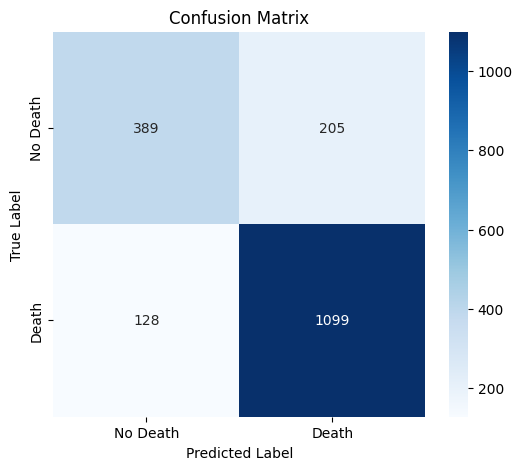

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = df.fillna(df.median())  

X = df.drop(columns=['death']) 
y = df['death'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Model K-Nearest Neighbors (KNN) menghasilkan akurasi 81.71%, yang menunjukkan performa cukup baik dalam klasifikasi "Death" dan "No Death". Dari classification report, model lebih akurat dalam mengenali kasus "Death" (precision 0.84, recall 0.90) dibanding "No Death" (precision 0.75, recall 0.65), yang berarti model cenderung lebih baik dalam mendeteksi kematian. Confusion matrix menunjukkan bahwa 1099 kasus "Death" terdeteksi dengan benar, namun ada 128 kasus "Death" yang salah diklasifikasikan sebagai "No Death", serta 389 kasus "No Death" yang benar, tetapi 205 lainnya salah diprediksi sebagai "Death".

### *Visualisasi Distribusi Umur Berdasarkan Status Kematian*

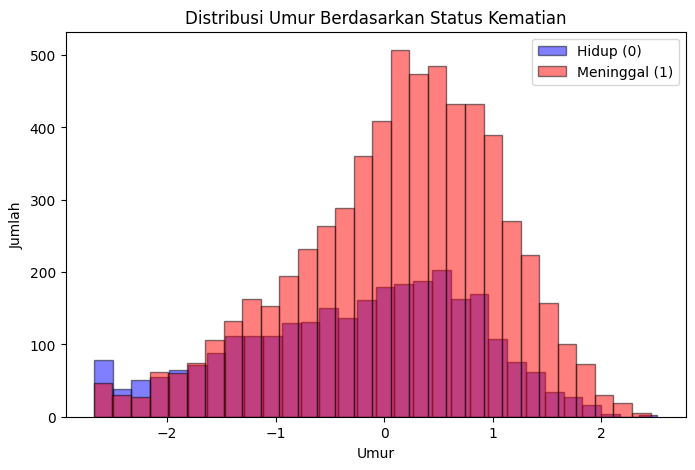

In [ ]:
import matplotlib.pyplot as plt

df['death'] = y  

plt.figure(figsize=(8, 5))
plt.hist(df[df['death'] == 0]["age"], bins=30, alpha=0.5, label="Hidup (0)", color="blue", edgecolor="black")
plt.hist(df[df['death'] == 1]["age"], bins=30, alpha=0.5, label="Meninggal (1)", color="red", edgecolor="black")

plt.title("Distribusi Umur Berdasarkan Status Kematian")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.legend()
plt.show()


Pada visualisasi ini dapat dilihat bahwa jumlah individu yang meninggal lebih banyak dibandingkan dengan yang hidup, terutama pada kelompok umur yang lebih tua. Sebagian besar kasus kematian berada di rentang usia menengah - tua, yang ditunjukkan dominasi warna merah di bagian tengah histogram. Sedangkan individu yang masih hidup tersebar lebih merata tetapi dalam jumlah lebih sedikit. Tumpang tindih warna ungu menunjukkan beberapa kelompok umur, baik individu yang hidup maupun meninggal memiliki distribusi yang sama. Pola ini menggambarkan bahwa umur memiliki hubungan dengan tingkat kematian.